# Silver 

We can download the data from the CFTC via Python.

Many data APIs become commercial for recent prices. 

In [1]:
import pandas as pd
import cot_reports as cot  # Ensure cot_reports is correctly imported and cot.cot_year() works as expected

df = pd.DataFrame()
begin_year = 2020
end_year = 2024

for i in range(begin_year, end_year + 1):
    # Assuming cot.cot_year returns a DataFrame
    single_year = pd.DataFrame(cot.cot_year(i, cot_report_type='disaggregated_fut'))
    single_year.to_csv(f'./COT_CFTC_{i}.csv', index=False)

Selected: disaggregated_fut
Downloaded single year data from: 2020
Stored the file f_year.txt in the working directory.
Selected: disaggregated_fut
Downloaded single year data from: 2021
Stored the file f_year.txt in the working directory.
Selected: disaggregated_fut
Downloaded single year data from: 2022
Stored the file f_year.txt in the working directory.
Selected: disaggregated_fut
Downloaded single year data from: 2023
Stored the file f_year.txt in the working directory.
Selected: disaggregated_fut
Downloaded single year data from: 2024
Stored the file f_year.txt in the working directory.


In [2]:
import glob

# Adjust the path and pattern according to your CSV files location and naming convention
csv_files = glob.glob('COT_CFTC_20*.csv')
print(csv_files)

['COT_CFTC_2022.csv', 'COT_CFTC_2023.csv', 'COT_CFTC_2021.csv', 'COT_CFTC_2020.csv', 'COT_CFTC_2024.csv']


At this point, we have the CFTC Disaggregated Futures report from 2022 to 2024 (until today)

## Load the data, and prepare the dataset

The CFTC report contains data on all futures, not just silver.

In [3]:
df = pd.read_csv('COT_CFTC_2024.csv')

/tmp/ipykernel_1629470/490941526.py:1: DtypeWarning: Columns (120,121,132,133,134,135,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('COT_CFTC_2024.csv')


In [4]:
import pandas as pd

df["Report_Date_as_YYYY-MM-DD"] = pd.to_datetime(df["Report_Date_as_YYYY-MM-DD"], format='%Y-%m-%d')
df.set_index("Report_Date_as_YYYY-MM-DD")
df.shape

(8344, 191)

In [5]:
!cat COT_CFTC_2024.csv | wc -l

8345


In [6]:
df.head()

,Market_and_Exchange_Names,As_of_Date_In_Form_YYMMDD,Report_Date_as_YYYY-MM-DD,CFTC_Contract_Market_Code,CFTC_Market_Code,CFTC_Region_Code,CFTC_Commodity_Code,Open_Interest_All,Prod_Merc_Positions_Long_All,Prod_Merc_Positions_Short_All,...,Conc_Net_LE_4_TDR_Long_Other,Conc_Net_LE_4_TDR_Short_Other,Conc_Net_LE_8_TDR_Long_Other,Conc_Net_LE_8_TDR_Short_Other,Contract_Units,CFTC_Contract_Market_Code_Quotes,CFTC_Market_Code_Quotes,CFTC_Commodity_Code_Quotes,CFTC_SubGroup_Code,FutOnly_or_Combined
0,WHEAT-SRW - CHICAGO BOARD OF TRADE,240813,2024-08-13,001602,CBT,0,1,401604,68899,85867,...,39.0,31.7,54.2,42.6,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1,A10,FutOnly
1,WHEAT-SRW - CHICAGO BOARD OF TRADE,240806,2024-08-06,001602,CBT,0,1,431547,73401,85750,...,41.6,32.3,57.3,41.7,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1,A10,FutOnly
2,WHEAT-SRW - CHICAGO BOARD OF TRADE,240730,2024-07-30,001602,CBT,0,1,432863,73086,83875,...,46.0,28.5,60.8,38.4,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1,A10,FutOnly
3,WHEAT-SRW - CHICAGO BOARD OF TRADE,240723,2024-07-23,001602,CBT,0,1,421227,63636,81374,...,48.3,27.9,63.5,37.7,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1,A10,FutOnly
4,WHEAT-SRW - CHICAGO BOARD OF TRADE,240716,2024-07-16,001602,CBT,0,1,413885,64297,81558,...,50.4,28.0,65.9,37.3,"(CONTRACTS OF 5,000 BUSHELS)",001602,CBT,1,A10,FutOnly


In [8]:
import pandas as pd

# Filter for rows where "Market_and_Exchange_Names" matches either of the specified values
silver_df = df[df["Market_and_Exchange_Names"].isin(["SILVER - COMMODITY EXCHANGE INC."])].copy()


# After filtering, you can standardize the "Market_and_Exchange_Names" if you want all of them to have the same name
# This is optional and based on your specific requirement to 'merge' under a unified label
silver_df["Market_and_Exchange_Names"] = "COPPER-GRADE #1 - COMMODITY EXCHANGE INC."

silver_df["Report_Date_as_YYYY-MM-DD"] = pd.to_datetime(df["Report_Date_as_YYYY-MM-DD"], format='%Y-%m-%d')
silver_df = silver_df.set_index("Report_Date_as_YYYY-MM-DD")

In [12]:
silver_df.shape # we have calendar week 33

(33, 190)

In [20]:
print(list(silver_df.columns))

['Market_and_Exchange_Names', 'As_of_Date_In_Form_YYMMDD', 'CFTC_Contract_Market_Code', 'CFTC_Market_Code', 'CFTC_Region_Code', 'CFTC_Commodity_Code', 'Open_Interest_All', 'Prod_Merc_Positions_Long_All', 'Prod_Merc_Positions_Short_All', 'Swap_Positions_Long_All', 'Swap__Positions_Short_All', 'Swap__Positions_Spread_All', 'M_Money_Positions_Long_All', 'M_Money_Positions_Short_All', 'M_Money_Positions_Spread_All', 'Other_Rept_Positions_Long_All', 'Other_Rept_Positions_Short_All', 'Other_Rept_Positions_Spread_All', 'Tot_Rept_Positions_Long_All', 'Tot_Rept_Positions_Short_All', 'NonRept_Positions_Long_All', 'NonRept_Positions_Short_All', 'Open_Interest_Old', 'Prod_Merc_Positions_Long_Old', 'Prod_Merc_Positions_Short_Old', 'Swap_Positions_Long_Old', 'Swap__Positions_Short_Old', 'Swap__Positions_Spread_Old', 'M_Money_Positions_Long_Old', 'M_Money_Positions_Short_Old', 'M_Money_Positions_Spread_Old', 'Other_Rept_Positions_Long_Old', 'Other_Rept_Positions_Short_Old', 'Other_Rept_Positions_Spre

In [14]:
open_interest_pct_old_columns = [col for col in df.columns if 'pct' in col.lower() and col.endswith('_Old')]
open_interest_pct_old_columns

['Pct_of_Open_Interest_Old',
 'Pct_of_OI_Prod_Merc_Long_Old',
 'Pct_of_OI_Prod_Merc_Short_Old',
 'Pct_of_OI_Swap_Long_Old',
 'Pct_of_OI_Swap_Short_Old',
 'Pct_of_OI_Swap_Spread_Old',
 'Pct_of_OI_M_Money_Long_Old',
 'Pct_of_OI_M_Money_Short_Old',
 'Pct_of_OI_M_Money_Spread_Old',
 'Pct_of_OI_Other_Rept_Long_Old',
 'Pct_of_OI_Other_Rept_Short_Old',
 'Pct_of_OI_Other_Rept_Spread_Old',
 'Pct_of_OI_Tot_Rept_Long_Old',
 'Pct_of_OI_Tot_Rept_Short_Old',
 'Pct_of_OI_NonRept_Long_Old',
 'Pct_of_OI_NonRept_Short_Old']

In [21]:
needed_columns = ["Open_Interest_All", "Pct_of_OI_Prod_Merc_Long_Old", "Pct_of_OI_Prod_Merc_Short_Old"]

In [22]:
filtered_silver_df = silver_df[needed_columns].copy()
filtered_silver_df.head()

,Open_Interest_All,Pct_of_OI_Prod_Merc_Long_Old,Pct_of_OI_Prod_Merc_Short_Old
Report_Date_as_YYYY-MM-DD,,,
2024-08-13,147859,3.1,25.3
2024-08-06,147537,3.0,25.4
2024-07-30,151437,2.7,25.4
2024-07-23,157106,2.2,25.8
2024-07-16,166641,1.7,26.0


## Open Interest (COT) CFTC

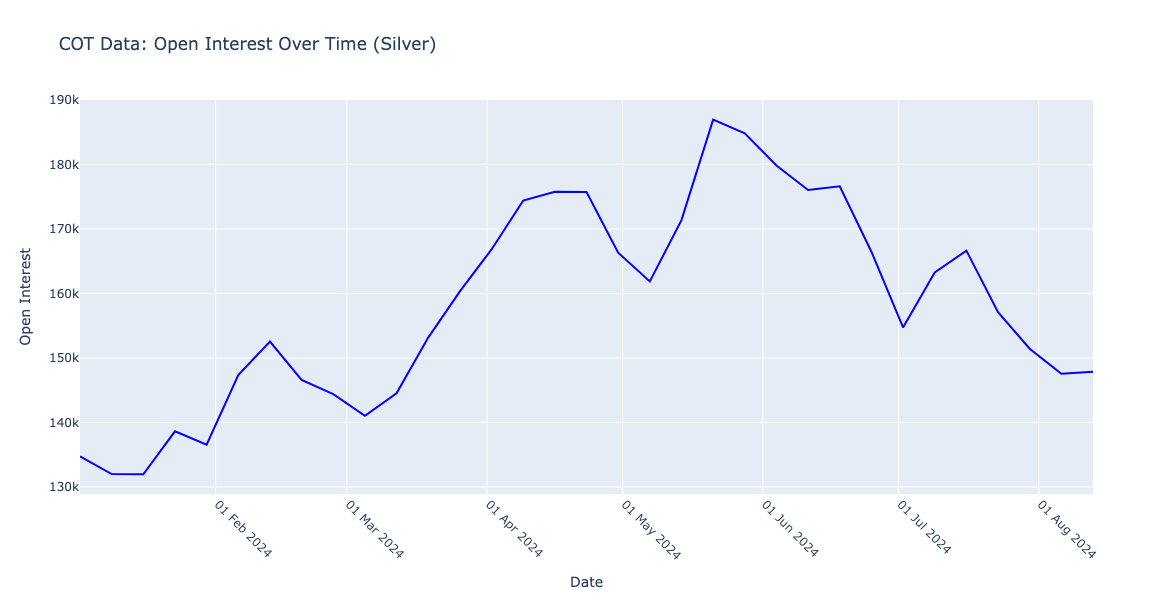


Metrics for Open Interest:
Volatility (Standard Deviation): 15889.35
Average: 158040.03
Median: 157106.00
Minimum: 131956.00
Maximum: 186945.00
Typical Range: 146584.00 to 171371.00

Overall trend: Downward

Significant points:
Peak on 4: 166641.00
Peak on 12: 186945.00
Peak on 17: 175784.00
Peak on 26: 152544.00
Peak on 29: 138617.00
Trough on 6: 154724.00
Trough on 14: 161868.00
Trough on 23: 141026.00
Trough on 28: 136544.00
Trough on 30: 131956.00

Sudden changes (>5% day-to-day):
2024-07-16 00:00:00: 6.07% change
2024-07-02 00:00:00: -5.22% change
2024-06-25 00:00:00: 7.59% change
2024-06-18 00:00:00: 6.09% change
2024-05-14 00:00:00: -8.33% change
2024-05-07 00:00:00: -5.55% change
2024-04-23 00:00:00: 5.67% change
2024-03-12 00:00:00: -5.63% change
2024-01-30 00:00:00: -7.32% change


In [29]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from scipy import signal

# Assuming df is your DataFrame with the COT data
# If not, you'll need to load your data here

# Create the main figure
fig = go.Figure()

# Add trace for Open Interest
fig.add_trace(go.Scatter(
    x=filtered_silver_df.index, 
    y=filtered_silver_df['Open_Interest_All'], 
    mode='lines',
    name='Open Interest',
    line=dict(width=2, color='blue')
))

# Update layout
fig.update_layout(
    title='COT Data: Open Interest Over Time (Silver)',
    yaxis_title='Open Interest',
    xaxis_title='Date',
    height=600,
    width=800,
    hovermode='x unified'
)

# Improve date labeling for better readability
fig.update_xaxes(
    tickformat="%d %b %Y",
    tickangle=45,
    dtick="M1",
    ticklabelmode="period"
)

# Show the plot
fig.show()

# Calculate and print metrics
print("\nMetrics for Open Interest:")
data = filtered_silver_df['Open_Interest_All']

print(f"Volatility (Standard Deviation): {data.std():.2f}")
print(f"Average: {data.mean():.2f}")
print(f"Median: {data.median():.2f}")
print(f"Minimum: {data.min():.2f}")
print(f"Maximum: {data.max():.2f}")

# Calculate typical range
typical_low = np.percentile(data, 25)
typical_high = np.percentile(data, 75)
print(f"Typical Range: {typical_low:.2f} to {typical_high:.2f}")

# Identify trends
def identify_trend(series):
    # Calculate the overall trend
    trend = np.polyfit(range(len(series)), series, 1)[0]
    if trend > 0:
        return "Upward"
    elif trend < 0:
        return "Downward"
    else:
        return "Stable"

trend = identify_trend(data)
print(f"\nOverall trend: {trend}")

# Identify significant points
def find_peaks(series, prominence=1000):
    peaks, _ = signal.find_peaks(series, prominence=prominence)
    troughs, _ = signal.find_peaks(-series, prominence=prominence)
    return peaks, troughs

peaks, troughs = find_peaks(data)

print("\nSignificant points:")
for peak in peaks:
    print(f"Peak on {df.index[peak]}: {data.iloc[peak]:.2f}")
for trough in troughs:
    print(f"Trough on {df.index[trough]}: {data.iloc[trough]:.2f}")

# Identify sudden changes
pct_change = data.pct_change()
sudden_changes = pct_change[abs(pct_change) > 0.05]  # 5% threshold
if not sudden_changes.empty:
    print("\nSudden changes (>5% day-to-day):")
    for date, change in sudden_changes.items():
        print(f"{date}: {change*100:.2f}% change")
else:
    print("\nNo sudden changes above 5% threshold detected.")

## Data Export for AmiBroker

(You have to tick the box "No quotation data" in the Import wizard and select the fields according to the CSV header)

In [31]:
import pandas as pd

def export_to_amibroker_csv(df, output_file='amibroker_data.csv'):
    # Create a copy of the DataFrame to avoid modifying the original
    export_df = df.copy()
    
    # Reset the index to make the date a column
    export_df = export_df.reset_index()
    
    # Rename columns to match AmiBroker format
    export_df['Date'] = pd.to_datetime(export_df['Report_Date_as_YYYY-MM-DD'])
    export_df['Close'] = export_df['Open_Interest_All']
    export_df['Volume'] = export_df['Pct_of_OI_Prod_Merc_Long_Old']
    
    # Create Open, High, Low columns with the same value as Close
    export_df['Open'] = export_df['Close']
    export_df['High'] = export_df['Close']
    export_df['Low'] = export_df['Close']
    
    # Select and order columns for AmiBroker
    amibroker_df = export_df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
    
    # Sort by date in descending order (most recent first)
    amibroker_df = amibroker_df.sort_values('Date', ascending=False)
    
    # Export to CSV
    amibroker_df.to_csv(output_file, index=False, date_format='%Y-%m-%d')
    print(f"Data exported to {output_file}")

# Usage
export_to_amibroker_csv(filtered_silver_df, 'silver_data_for_amibroker.csv')

Data exported to silver_data_for_amibroker.csv
